# Bangla Sentiment Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
import nltk 

# Reading the data

In [2]:
# Importing the dataset
classDict = {'neg': 0, 'pos': 1,'ntr': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "data.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
    print('read file complete')
    
    return sentences, labels

In [3]:
sentences, labels = read_File()

read file complete


# Create pandas dataframe

In [4]:
# Create pandas dataframe
data = {'label': labels, 'sentence': sentences}

df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head()

,label,sentence
0,pos,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
1,neg,"কি বিচিত্র এই দেশ, আর একজন ক্বারি ওবায়দুল্ল..."
2,pos,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
3,pos,"অভিনন্দন তোমা‌কে মুস্তা‌ফিজ, তু‌মি এর উপযুক্ত..."
4,pos,আলহামদুলিল্লাহ। অভিনন্দন সাতক্ষীরা বাসির অহংকা...


In [5]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     2449 non-null   object
 1   sentence  2449 non-null   object
dtypes: object(2)
memory usage: 38.4+ KB


In [6]:
# Discribe the dataset
df.describe(include='all')

,label,sentence
count,2449,2449
unique,3,2419
top,neg,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
freq,1367,3


<AxesSubplot: >

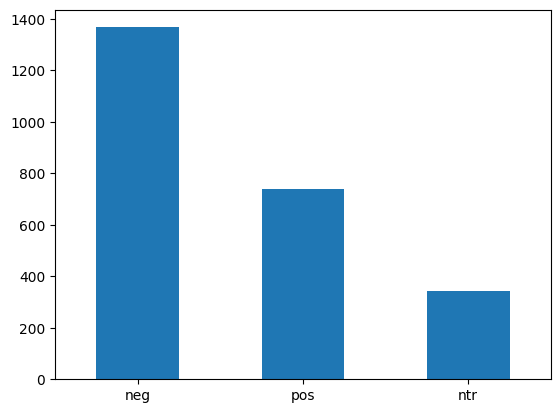

In [7]:
# Count Plot for label
df['label'].value_counts().plot(kind="bar", rot=0)

# Data Cleaning

In [8]:
# Define a function to clean the sentences
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌…Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [9]:
df.loc[15,'sentence']

'আর একটা কথা না বললেই নয়,আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়।এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে।\n'

In [10]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'clean_sentence'] = clean_sentence(sent)

In [11]:
test = df.loc[15,'clean_sentence']
test

'আর একটা কথা না বললেই নয়আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে'

# Tokenized Sentence

In [12]:
# Tokenized Sentence
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

# Remove stopwords

In [13]:
# Remove stopwords
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [14]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : আর একটা কথা না বললেই নয়আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে
after : আর কথা না বললেই নয়আই ছি ছি সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস


In [15]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)


In [16]:
# Display the data
df.head()

,label,sentence,clean_sentence,clean_data
0,pos,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...,একজন বাংলাদেশী হিসাবে আমি গর্বিত আরও গর্বিত যে...,একজন বাংলাদেশী হিসাবে গর্বিত গর্বিত দেশের একজন...
1,neg,"কি বিচিত্র এই দেশ, আর একজন ক্বারি ওবায়দুল্ল...",কি বিচিত্র এই দেশ আর একজন ক্বারি ওবায়দুল্লাহ্...,বিচিত্র দেশ আর একজন ক্বারি ওবায়দুল্লাহ্ দেশে ...
2,pos,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
3,pos,"অভিনন্দন তোমা‌কে মুস্তা‌ফিজ, তু‌মি এর উপযুক্ত...",অভিনন্দন তোমা‌কে মুস্তা‌ফিজ তু‌মি এর উপযুক্ত ...,অভিনন্দন তোমা‌কে মুস্তা‌ফিজ তু‌মি উপযুক্ত ছি‌...
4,pos,আলহামদুলিল্লাহ। অভিনন্দন সাতক্ষীরা বাসির অহংকা...,আলহামদুলিল্লাহ অভিনন্দন সাতক্ষীরা বাসির অহংকার...,আলহামদুলিল্লাহ অভিনন্দন সাতক্ষীরা বাসির অহংকার...


# Word to Vector transformation by ngram approch

In [17]:
# Word to Vector transformation by ngram approch
from sklearn.feature_extraction.text import CountVectorizer

stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names()

print(len(stpGram))


41465


c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])

36678
sample of bigram :  অংশটুকু ফাইন


In [19]:
import numpy as np
def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [20]:
def sentence_to_vector(data, stpGram):
    dataForSVM = []
    colName = []
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)
        
    return dataForSVM

In [21]:
data = sentence_to_vector(df['clean_data'], stpGram_rsw)
data[0:4]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

# Data split for training and testing

In [22]:
# Data split for training and testing
from sklearn.model_selection import train_test_split

# Feture Matrix and Target Vector
X = data
y = label2id

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))
print("y_train size: ", len(y_train))
print("y_test size: ", len(y_test))

X_train size:  1959
X_test size:  490
y_train size:  1959
y_test size:  490


# Train Model

In [23]:
# SVM model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression Classifier
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Train the model using the training sets
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Accuracy Testing

In [27]:
# Accuracy Testing
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def calculate_accuracy(kernel, model):
    y_pred = model.predict(X_test)
    
    #print the accuracy score of the model
    print(kernel + " accuracy : ",metrics.accuracy_score(y_test, y_pred, normalize = True))
    score = confusion_matrix(y_test, y_pred)
    print('confusion_matrix: \n', score)

    # Show the confusion matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(7,5))
    sns.heatmap(score, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'rainbow');
    plt.ylabel('Actual label');

    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
    plt.title(all_sample_title, size = 15);

    # Store the Accuracy Score
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    return accuracy_score

SVM accuracy :  0.6959183673469388
confusion_matrix: 
 [[232  20  20]
 [ 41  98   8]
 [ 46  14  11]]


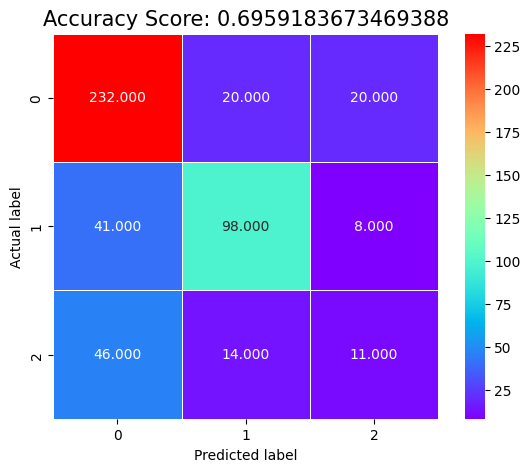

In [28]:
# SVM Accuracy and Confusion Matrix and store the accuracy score
svm_accuracy = calculate_accuracy('SVM', clf)

KNN accuracy :  0.4387755102040816
confusion_matrix: 
 [[ 87 129  56]
 [ 24 113  10]
 [ 24  32  15]]


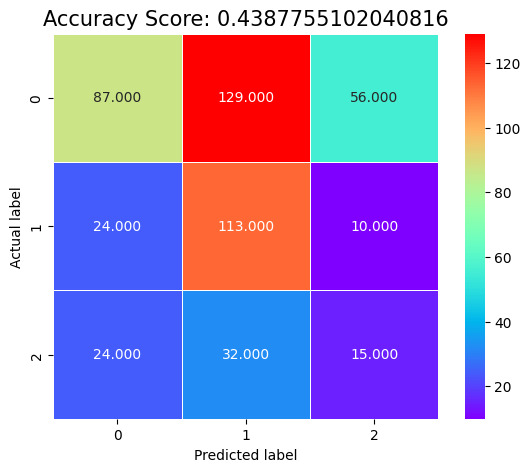

In [29]:
# KNN Accuracy and Confusion Matrix and store the accuracy score
knn_accuracy = calculate_accuracy('KNN', knn)

Logistic Regression accuracy :  0.7346938775510204
confusion_matrix: 
 [[254  14   4]
 [ 46  99   2]
 [ 52  12   7]]


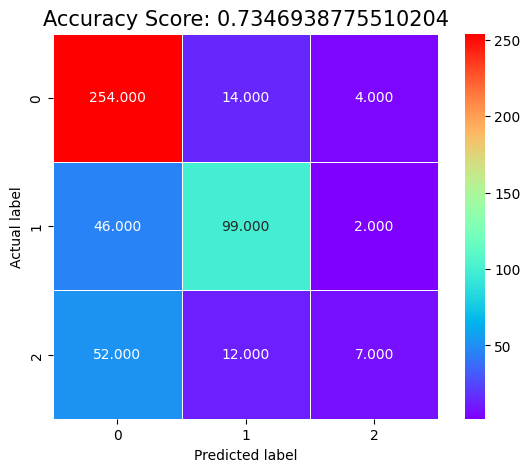

In [30]:
# Logistic Regression Accuracy and Confusion Matrix and store the accuracy score
logreg_accuracy = calculate_accuracy('Logistic Regression', logreg)

Decision Tree accuracy :  0.5591836734693878
confusion_matrix: 
 [[156  74  42]
 [ 31 110   6]
 [ 35  28   8]]


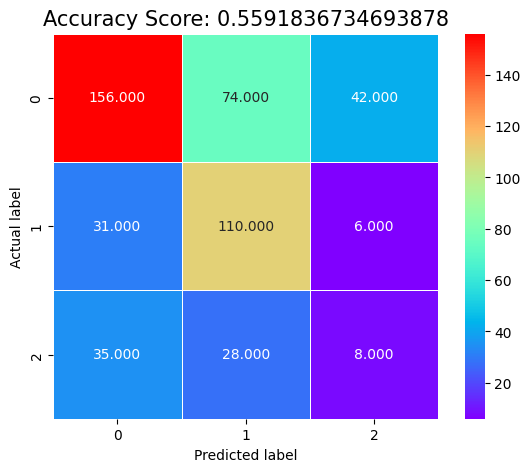

In [31]:
# Decision Tree Accuracy and Confusion Matrix and store the accuracy score
dtree_accuracy = calculate_accuracy('Decision Tree', dtree)

                 Model  Accuracy Score
2  Logistic Regression        0.734694
0                  SVM        0.695918
3        Decision Tree        0.559184
1                  KNN        0.438776


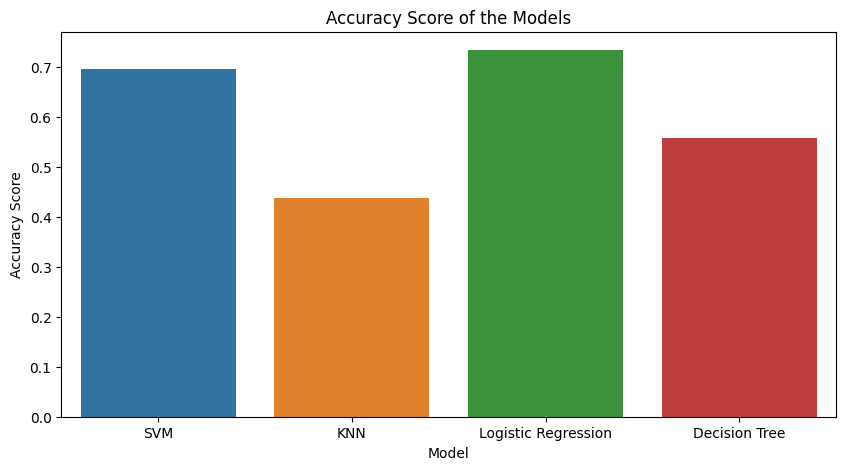

In [32]:
# Store the accuracy score in a dataframe
accuracy_score = pd.DataFrame({'Model': ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree'],
                                 'Accuracy Score': [svm_accuracy, knn_accuracy, logreg_accuracy, dtree_accuracy]})
print(accuracy_score.sort_values(by='Accuracy Score', ascending=False))

# Plot the accuracy score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy Score', data=accuracy_score)
plt.title('Accuracy Score of the Models')
plt.show()

In [33]:
# Save the model using joblib
import joblib
filename = 'logistic_regression_model.sav'
joblib.dump(logreg, filename)


['logistic_regression_model.sav']

# Get output from sentence

In [34]:
sent = 'অনেক অনেক শুভেচ্ছা ও অফুরন্ত শুভকামনা'

sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent, stpGram_rsw)
sent_list = list()
sent_list.append(sent2vec)

# load the model from disk
loaded_model = joblib.load('logistic_regression_model.sav')
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[1]
{'neg': 0, 'pos': 1, 'ntr': 2}
pos
